In [20]:
import pandas as pd


train_file_path = 'emnist-bymerge-train.csv'


try:
    emnist_train_df = pd.read_csv(train_file_path, header=None)
    print(f"Successfully loaded {train_file_path}")
    print(f"Dataset shape: {emnist_train_df.shape}")
    print("First 5 rows:")
    # Display the first few rows to verify
    print(emnist_train_df.head())
except FileNotFoundError:
    print(f"Error: Could not find the file at {train_file_path}")
    print("Please double-check the file path and make sure the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully loaded emnist-bymerge-train.csv
Dataset shape: (697932, 785)
First 5 rows:
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0   24    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1   36    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    5    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    6    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4   35    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


In [21]:
# Separate labels (first column) and image pixels (remaining columns)
y_train = emnist_train_df.iloc[:, 0]
X_train = emnist_train_df.iloc[:, 1:]

# Print the shapes to verify
print(f"Labels shape: {y_train.shape}")
print(f"Images shape: {X_train.shape}")


Labels shape: (697932,)
Images shape: (697932, 784)


In [22]:
import numpy as np

# Define the path to your mapping file
# Make sure to update this path if necessary
mapping_file_path = 'emnist-bymerge-mapping.txt'

# Create a dictionary to store the mapping
label_map = {}
try:
    with open(mapping_file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                label_map[int(parts[0])] = chr(int(parts[1])) # Convert ASCII code to character
    print("Successfully loaded label mapping.")
    # Print a few mappings as examples
    print("Example mappings:", {k: label_map[k] for k in list(label_map)[:5]})
    print(f"Total classes found in mapping: {len(label_map)}")
except FileNotFoundError:
    print(f"Error: Could not find the mapping file at {mapping_file_path}")
    print("Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred while reading mapping file: {e}")


Successfully loaded label mapping.
Example mappings: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}
Total classes found in mapping: 47


In [23]:
# Get the counts for each class label
class_counts = y_train.value_counts().sort_index()

# Print the counts for the first 10 classes as an example
print("Class counts (first 10 classes):")
print(class_counts.head(10))

# Print total number of unique classes found in the data
print(f"\nTotal unique classes in training data: {len(class_counts)}")


Class counts (first 10 classes):
0
0    34618
1    38304
2    34307
3    35285
4    33656
5    31280
6    34150
7    36020
8    33924
9    33882
Name: count, dtype: int64

Total unique classes in training data: 47


C:\Users\ali\AppData\Local\Temp\ipykernel_8884\227236362.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


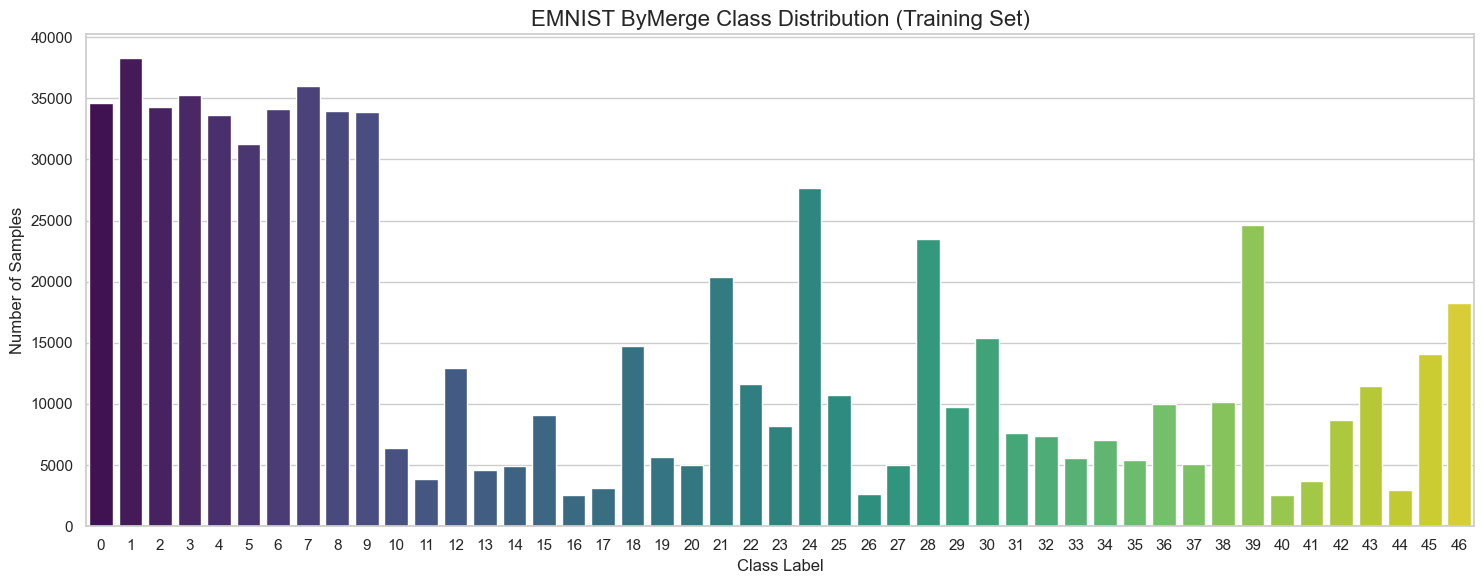

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create the figure and axes for the plot
plt.figure(figsize=(15, 6))

# Create the bar plot
# We use the numeric labels for plotting but can map them later if needed
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")

# Add titles and labels
plt.title('EMNIST ByMerge Class Distribution (Training Set)', fontsize=16)
plt.ylabel('Number of Samples', fontsize=12)
plt.xlabel('Class Label', fontsize=12)

# Optionally, set x-ticks to show character labels if mapping loaded successfully
# This might be crowded with 47 classes, but useful for smaller ranges
# if 'label_map' in locals() and label_map:
#     tick_labels = [label_map.get(i, str(i)) for i in class_counts.index]
#     plt.xticks(ticks=range(len(tick_labels)), labels=tick_labels, rotation=90, fontsize=8)

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()


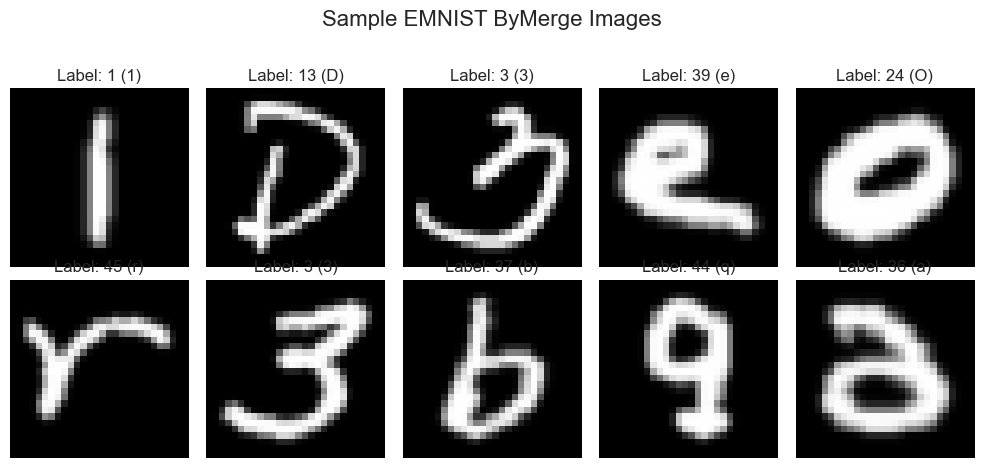

In [25]:
# Reshape the image data (assuming it's flattened) and normalize
# EMNIST images are typically rotated and flipped compared to MNIST
# We need to reshape to 28x28 and transpose
num_images_to_show = 10

plt.figure(figsize=(10, 5))
for i in range(num_images_to_show):
    # Get a random index
    idx = np.random.randint(0, X_train.shape[0])
    # Get the image and label
    image = X_train.iloc[idx].values
    label_numeric = y_train.iloc[idx]
    label_char = label_map.get(label_numeric, 'Unknown') # Get char label from map

    # Reshape and transpose the image
    image_reshaped = image.reshape(28, 28).T # Transpose needed for EMNIST

    # Create subplot
    plt.subplot(2, 5, i + 1) # Arrange in 2 rows, 5 columns
    plt.imshow(image_reshaped, cmap='gray')
    plt.title(f"Label: {label_numeric} ({label_char})")
    plt.axis('off') # Hide axes

plt.suptitle('Sample EMNIST ByMerge Images', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()



In [26]:
# Find the class label with the minimum count
minority_class_label = class_counts.idxmin()
minority_class_count = class_counts.min()

# Get the character representation using the mapping
minority_class_char = label_map.get(minority_class_label, 'Unknown')

print(f"Identified minority class:")
print(f"  Label: {minority_class_label}")
print(f"  Character: 	{minority_class_char}")
print(f"  Number of samples: {minority_class_count}")



Identified minority class:
  Label: 16
  Character: 	G
  Number of samples: 2534


In [27]:
# Filter the original training images (X_train) and labels (y_train)
# Keep only the rows where the label matches the minority_class_label
minority_images = X_train[y_train == minority_class_label]
minority_labels = y_train[y_train == minority_class_label] # We might not need labels for GAN, but good to keep track

print(f"Filtered dataset shape for minority class images: {minority_images.shape}")


Filtered dataset shape for minority class images: (2534, 784)


In [28]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# Convert the filtered pandas DataFrame to a NumPy array
minority_images_np = minority_images.values.astype(np.float32)

# Reshape each image (784 pixels) to 28x28 and transpose (as required for EMNIST)
# Then add a channel dimension (1 for grayscale) -> (N, 1, 28, 28)
minority_images_reshaped = minority_images_np.reshape(-1, 28, 28).transpose(0, 2, 1)
minority_images_reshaped = np.expand_dims(minority_images_reshaped, axis=1)

print(f"Reshaped minority images shape: {minority_images_reshaped.shape}")

# Define transformations: Convert to tensor and normalize
# Normalize to [-1, 1] range: (pixel - 127.5) / 127.5
transform = transforms.Compose([
    transforms.ToTensor(), # Converts numpy array (H x W x C) in range [0, 255] to Tensor (C x H x W) in range [0.0, 1.0]
    transforms.Normalize((0.5,), (0.5,)) # Normalizes Tensor to range [-1, 1] using mean=0.5, std=0.5
])

# Apply the transform
# Note: ToTensor expects H x W x C, but our data is N x C x H x W (N=num_samples, C=1, H=28, W=28)
# We need to apply ToTensor and Normalize carefully. Let's process manually for clarity.

# 1. Convert reshaped numpy array to PyTorch tensor
minority_images_tensor = torch.from_numpy(minority_images_reshaped)

# 2. Normalize the tensor from [0, 255] to [-1, 1]
# First scale to [0, 1] by dividing by 255.0
minority_images_tensor = minority_images_tensor / 255.0
# Then scale to [-1, 1] using the formula: 2 * tensor - 1 OR (tensor - 0.5) / 0.5
minority_images_tensor = (minority_images_tensor - 0.5) / 0.5

print(f"Processed tensor shape: {minority_images_tensor.shape}")
print(f"Min pixel value: {minority_images_tensor.min()}")
print(f"Max pixel value: {minority_images_tensor.max()}")


Reshaped minority images shape: (2534, 1, 28, 28)
Processed tensor shape: torch.Size([2534, 1, 28, 28])
Min pixel value: -1.0
Max pixel value: 1.0


In [29]:
# Define batch size for training
batch_size = 64 # You can adjust this later based on memory/performance

# Create a TensorDataset (we only need images for unconditional GAN)
minority_dataset = TensorDataset(minority_images_tensor)

# Create the DataLoader
minority_dataloader = DataLoader(
    dataset=minority_dataset,
    batch_size=batch_size,
    shuffle=True, # Shuffle data for each epoch
    num_workers=2 # Optional: Use multiple subprocesses for data loading
)

print(f"Created DataLoader with {len(minority_dataloader)} batches of size {batch_size}.")




Created DataLoader with 40 batches of size 64.


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Generator network
class Generator(nn.Module):
    def __init__(self, latent_dim, img_shape):
        super(Generator, self).__init__()
        self.img_shape = img_shape # (Channels, Height, Width), e.g., (1, 28, 28)
        
        # Simple feedforward network
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, int(np.prod(img_shape))), # Output size = C*H*W
            nn.Tanh() # Output pixel values between -1 and 1
        )

    def forward(self, z):
        # Generate image from noise vector z
        img_flat = self.model(z)
        # Reshape flat output to image shape C x H x W
        img = img_flat.view(img_flat.size(0), *self.img_shape)
        return img



In [31]:
# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, img_shape):
        super(Discriminator, self).__init__()
        
        # Simple feedforward network
        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid() # Output a probability (0=fake, 1=real)
        )

    def forward(self, img):
        # Flatten image C x H x W to C*H*W
        img_flat = img.view(img.size(0), -1)
        # Get validity score (probability of being real)
        validity = self.model(img_flat)
        return validity


In [32]:
# Hyperparameters
latent_dim = 100 # Size of the noise vector input to Generator
img_shape = (1, 28, 28) # Shape of the images (Channels, Height, Width)
lr = 0.0002 # Learning rate
b1 = 0.5 # Adam optimizer beta1
b2 = 0.999 # Adam optimizer beta2
n_epochs = 50 # Number of training epochs 

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialize Generator and Discriminator
# Ensure the Generator and Discriminator class definitions have been executed in a previous cell
generator = Generator(latent_dim, img_shape).to(device)
discriminator = Discriminator(img_shape).to(device)

# Loss function
adversarial_loss = nn.BCELoss().to(device) # Binary Cross Entropy Loss

# Optimizers (using the imported 'optim' module)
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(b1, b2))
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

print("Initialization complete.")




Using device: cpu
Initialization complete.



Training finished in 151.79s


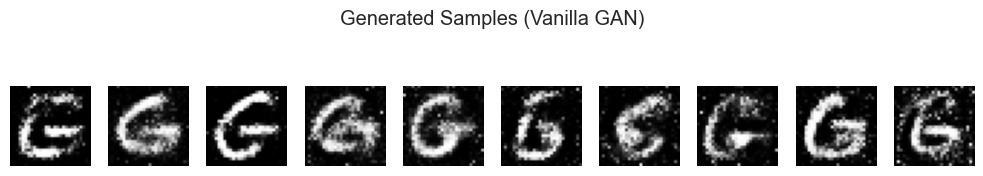

In [33]:
import time

# Training loop
start_time = time.time()

for epoch in range(n_epochs):
    for i, (imgs,) in enumerate(minority_dataloader): # We only need images from the dataloader
        
        # Ground truths for real (1) and fake (0) images
        real_labels = torch.ones(imgs.size(0), 1, device=device, dtype=torch.float32)
        fake_labels = torch.zeros(imgs.size(0), 1, device=device, dtype=torch.float32)
        
        # Move real images to the correct device
        real_imgs = imgs.to(device)
        
        # --------------------- #
        #  Train Discriminator #
        # --------------------- #
        optimizer_D.zero_grad()
        
        # Sample noise as generator input
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        
        # Generate a batch of fake images
        fake_imgs = generator(z)
        
        # Measure discriminator's ability to classify real images
        real_loss = adversarial_loss(discriminator(real_imgs), real_labels)
        
        # Measure discriminator's ability to classify fake images (detach generator history)
        fake_loss = adversarial_loss(discriminator(fake_imgs.detach()), fake_labels)
        
        # Total discriminator loss
        d_loss = (real_loss + fake_loss) / 2
        
        # Backpropagate and update discriminator weights
        d_loss.backward()
        optimizer_D.step()
        
        # ----------------- #
        #  Train Generator #
        # ----------------- #
        optimizer_G.zero_grad()
        
        # Generate a new batch of fake images (with updated generator)
        gen_imgs = generator(z)
        
        # Measure generator's ability to fool the discriminator
        # We want the discriminator to output 1 (real) for these fake images
        g_loss = adversarial_loss(discriminator(gen_imgs), real_labels)
        
        # Backpropagate and update generator weights
        g_loss.backward()
        optimizer_G.step()
        
        # --- Print Progress --- #
        if (i + 1) % 100 == 0: # Print every 100 batches
            batches_done = epoch * len(minority_dataloader) + i + 1
            print(
                f"[Epoch {epoch+1}/{n_epochs}] [Batch {i+1}/{len(minority_dataloader)}] "
                f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}] "
                f"Time: {time.time() - start_time:.2f}s"
            )

print(f"\nTraining finished in {time.time() - start_time:.2f}s")

# Generate some images after training
with torch.no_grad():
    z_sample = torch.randn(10, latent_dim, device=device) # Generate 10 samples
    generated_samples = generator(z_sample).cpu() # Move to CPU for plotting

# Visualize the generated samples
plt.figure(figsize=(10, 2))
plt.suptitle("Generated Samples (Vanilla GAN)")
for i in range(10):
    plt.subplot(1, 10, i + 1)
    # Images are normalized to [-1, 1], rescale to [0, 1] for display
    img_display = (generated_samples[i] * 0.5 + 0.5).squeeze() # Remove channel dim
    plt.imshow(img_display, cmap='gray')
    plt.axis('off')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [34]:
# Calculate the counts for each class in the full dataset
full_class_counts = y_train.value_counts()

# Calculate the average number of samples per class
average_class_size = int(full_class_counts.mean())

# Recall the number of samples we already have for the minority class
# Assuming 'minority_class_count' was calculated earlier
print(f"Original count for minority class ({label_map.get(minority_class_label, minority_class_label)}): {minority_class_count}")
print(f"Average samples per class in full dataset: {average_class_size}")

# Calculate how many samples we need to generate
num_samples_to_generate = average_class_size - minority_class_count
if num_samples_to_generate < 0:
    num_samples_to_generate = 0 # Don't generate if already above average

print(f"Number of synthetic samples to generate: {num_samples_to_generate}")


Original count for minority class (G): 2534
Average samples per class in full dataset: 14849
Number of synthetic samples to generate: 12315


Generating 12315 samples in 97 batches...
Successfully generated 12416 synthetic images.
Shape of generated images tensor: torch.Size([12416, 1, 28, 28])


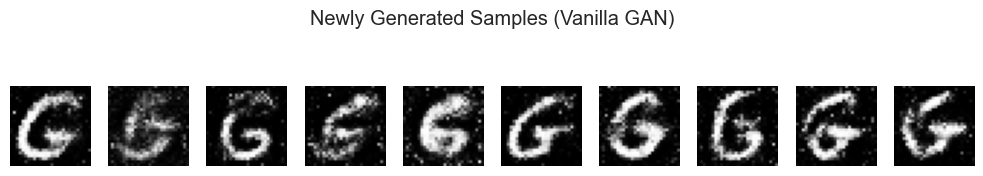

In [35]:
# Ensure generator is in evaluation mode (disables dropout/batchnorm updates)
generator.eval()

# List to store generated images
generated_images_list = []

# Generate images in batches to avoid memory issues if num_samples_to_generate is large
gen_batch_size = 128 # Can adjust this batch size
num_batches = (num_samples_to_generate + gen_batch_size - 1) // gen_batch_size

print(f"Generating {num_samples_to_generate} samples in {num_batches} batches...")

with torch.no_grad(): # No need to track gradients during generation
    for _ in range(num_batches):
        # Determine current batch size (last batch might be smaller)
        current_batch_size = min(gen_batch_size, num_samples_to_generate - len(generated_images_list))
        if current_batch_size <= 0:
            break
            
        # Sample noise
        z = torch.randn(current_batch_size, latent_dim, device=device)
        
        # Generate fake images
        batch_generated_images = generator(z)
        
        # Add generated images (on CPU) to the list
        generated_images_list.append(batch_generated_images.cpu())

# Concatenate all generated image batches into a single tensor
if generated_images_list:
    vanilla_gan_generated_images = torch.cat(generated_images_list, dim=0)
    print(f"Successfully generated {vanilla_gan_generated_images.shape[0]} synthetic images.")
    print(f"Shape of generated images tensor: {vanilla_gan_generated_images.shape}")
    # Keep them normalized between [-1, 1] for now. We'll handle normalization
    # consistently when preparing data for the classifier later.
else:
    vanilla_gan_generated_images = torch.empty((0, *img_shape)) # Create empty tensor if none generated
    print("No synthetic samples needed or generated.")

if vanilla_gan_generated_images.shape[0] > 0:
    plt.figure(figsize=(10, 2))
    plt.suptitle("Newly Generated Samples (Vanilla GAN)")
    num_to_show = min(10, vanilla_gan_generated_images.shape[0])
    for i in range(num_to_show):
        plt.subplot(1, 10, i + 1)
        img_display = (vanilla_gan_generated_images[i] * 0.5 + 0.5).squeeze()
        plt.imshow(img_display, cmap='gray')
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [36]:
# Create labels for the generated images
# Ensure minority_class_label holds the correct numeric label
vanilla_gan_generated_labels = torch.full((vanilla_gan_generated_images.shape[0],), minority_class_label, dtype=torch.long)

print(f"Shape of generated labels tensor: {vanilla_gan_generated_labels.shape}")


Shape of generated labels tensor: torch.Size([12416])


Now for the first GAN varient: DCGAN

In [37]:
# Define the DCGAN Generator network
class DCGAN_Generator(nn.Module):
    def __init__(self, latent_dim, img_channels, feature_maps):
        super(DCGAN_Generator, self).__init__()
        # Input: Latent vector z (latent_dim)
        # Output: Image (img_channels x 64 x 64) - we'll adapt for 28x28 later
        
        self.model = nn.Sequential(
            # Project latent vector z to feature maps
            # Input: (N, latent_dim, 1, 1)
            nn.ConvTranspose2d(latent_dim, feature_maps * 4, kernel_size=4, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(feature_maps * 4),
            nn.ReLU(True),
            # State size: (N, feature_maps*4, 4, 4)
            
            nn.ConvTranspose2d(feature_maps * 4, feature_maps * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_maps * 2),
            nn.ReLU(True),
            # State size: (N, feature_maps*2, 8, 8)
            
            nn.ConvTranspose2d(feature_maps * 2, feature_maps, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_maps),
            nn.ReLU(True),
            # State size: (N, feature_maps, 16, 16)
            
           
            nn.ConvTranspose2d(feature_maps, img_channels, kernel_size=4, stride=2, padding=3, bias=False),
            nn.Tanh() # Output pixel values between -1 and 1
            # Final state size: (N, img_channels, 28, 28)
        )

    def forward(self, z):
        # Reshape noise input: (N, latent_dim) -> (N, latent_dim, 1, 1)
        z_reshaped = z.view(z.size(0), -1, 1, 1)
        img = self.model(z_reshaped)
        return img


In [38]:
# Define the DCGAN Discriminator network
class DCGAN_Discriminator(nn.Module):
    def __init__(self, img_channels, feature_maps):
        super(DCGAN_Discriminator, self).__init__()
        # Input: Image (img_channels x 28 x 28)
        # Output: Probability (0=fake, 1=real)
        
        self.model = nn.Sequential(
            # Input: (N, img_channels, 28, 28)
            nn.Conv2d(img_channels, feature_maps, kernel_size=4, stride=2, padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # State size: (N, feature_maps, 14, 14)
            
            nn.Conv2d(feature_maps, feature_maps * 2, kernel_size=4, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(feature_maps * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # State size: (N, feature_maps*2, 7, 7)
            
            nn.Conv2d(feature_maps * 2, feature_maps * 4, kernel_size=3, stride=2, padding=0, bias=False), # Adjusted kernel/stride/padding for 7x7 input
            nn.BatchNorm2d(feature_maps * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # State size: (N, feature_maps*4, 3, 3) -- Check calculation: (7-3 + 2*0)/2 + 1 = 4/2 + 1 = 3

            # Final layer: Flatten and output probability
            nn.Conv2d(feature_maps * 4, 1, kernel_size=3, stride=1, padding=0, bias=False), # Output 1 channel from 3x3 input
            # State size: (N, 1, 1, 1)
            nn.Sigmoid() # Output probability
        )

    def forward(self, img):
        validity = self.model(img)
        # Reshape output to (N, 1) for loss calculation
        return validity.view(img.size(0), -1)


In [39]:
# Function to initialize weights as per DCGAN paper
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find("BatchNorm") != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

# Hyperparameters (can reuse or adjust from Vanilla GAN)
latent_dim = 100
img_channels = 1 # EMNIST is grayscale
feature_maps_g = 64 # Feature maps for Generator
feature_maps_d = 64 # Feature maps for Discriminator
lr_dcgan = 0.0002
b1_dcgan = 0.5
b2_dcgan = 0.999
n_epochs_dcgan = 50 # Adjust as needed, DCGAN might train faster/slower

# Initialize Generator and Discriminator
dcgan_generator = DCGAN_Generator(latent_dim, img_channels, feature_maps_g).to(device)
dcgan_discriminator = DCGAN_Discriminator(img_channels, feature_maps_d).to(device)

# Apply weights initialization
dcgan_generator.apply(weights_init)
dcgan_discriminator.apply(weights_init)

# Loss function (can reuse)
adversarial_loss = nn.BCELoss().to(device)

# Optimizers
optimizer_G_dcgan = optim.Adam(dcgan_generator.parameters(), lr=lr_dcgan, betas=(b1_dcgan, b2_dcgan))
optimizer_D_dcgan = optim.Adam(dcgan_discriminator.parameters(), lr=lr_dcgan, betas=(b1_dcgan, b2_dcgan))

print("DCGAN Initialization complete.")


DCGAN Initialization complete.


Starting DCGAN Training...

DCGAN Training finished in 331.81s


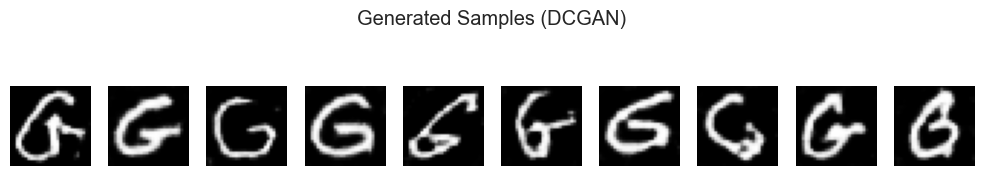

In [40]:
import time

# Training loop for DCGAN
start_time_dcgan = time.time()

print("Starting DCGAN Training...")
for epoch in range(n_epochs_dcgan):
    for i, (imgs,) in enumerate(minority_dataloader): # Use the same dataloader
        
        # Ground truths
        real_labels = torch.ones(imgs.size(0), 1, device=device, dtype=torch.float32)
        fake_labels = torch.zeros(imgs.size(0), 1, device=device, dtype=torch.float32)
        
        # Move real images to device
        real_imgs = imgs.to(device)
        
        # --------------------- #
        #  Train Discriminator #
        # --------------------- #
        optimizer_D_dcgan.zero_grad()
        
        # Sample noise
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        
        # Generate fake images
        fake_imgs = dcgan_generator(z)
        
        # Discriminator loss on real images
        real_loss = adversarial_loss(dcgan_discriminator(real_imgs), real_labels)
        
        # Discriminator loss on fake images
        fake_loss = adversarial_loss(dcgan_discriminator(fake_imgs.detach()), fake_labels)
        
        # Total discriminator loss
        d_loss_dcgan = (real_loss + fake_loss) / 2
        
        # Backpropagate and update
        d_loss_dcgan.backward()
        optimizer_D_dcgan.step()
        
        # ----------------- #
        #  Train Generator #
        # ----------------- #
        optimizer_G_dcgan.zero_grad()
        
        # Generate new fake images
        gen_imgs = dcgan_generator(z)
        
        # Generator loss (tries to fool discriminator)
        g_loss_dcgan = adversarial_loss(dcgan_discriminator(gen_imgs), real_labels)
        
        # Backpropagate and update
        g_loss_dcgan.backward()
        optimizer_G_dcgan.step()
        
        # --- Print Progress --- #
        if (i + 1) % 100 == 0:
            batches_done = epoch * len(minority_dataloader) + i + 1
            print(
                f"[DCGAN Epoch {epoch+1}/{n_epochs_dcgan}] [Batch {i+1}/{len(minority_dataloader)}] "
                f"[D loss: {d_loss_dcgan.item():.4f}] [G loss: {g_loss_dcgan.item():.4f}] "
                f"Time: {time.time() - start_time_dcgan:.2f}s"
            )

print(f"\nDCGAN Training finished in {time.time() - start_time_dcgan:.2f}s")


dcgan_generator.eval() # Set generator to evaluation mode
with torch.no_grad():
    z_sample = torch.randn(10, latent_dim, device=device)
    generated_samples_dcgan = dcgan_generator(z_sample).cpu()

plt.figure(figsize=(10, 2))
plt.suptitle("Generated Samples (DCGAN)")
for i in range(10):
    plt.subplot(1, 10, i + 1)
    img_display = (generated_samples_dcgan[i] * 0.5 + 0.5).squeeze()
    plt.imshow(img_display, cmap="gray")
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Generating 12315 samples using DCGAN in 97 batches...
Successfully generated 128 synthetic images using DCGAN.
Shape of DCGAN generated images tensor: torch.Size([128, 1, 28, 28])


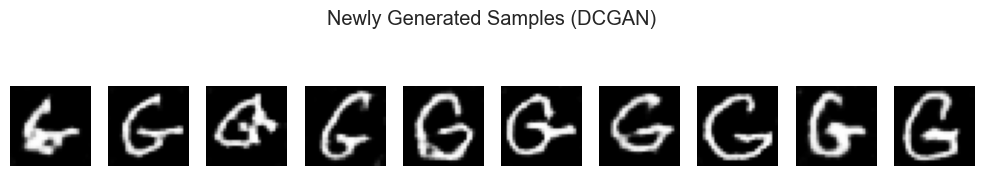

In [41]:
# Ensure DCGAN generator is in evaluation mode
dcgan_generator.eval()

# List to store generated images
dcgan_generated_images_list = []

# Use the same number of samples to generate as calculated before
# Assuming 'num_samples_to_generate' variable still holds the correct value
print(f"Generating {num_samples_to_generate} samples using DCGAN in {num_batches} batches...")

with torch.no_grad(): # No need to track gradients
    for _ in range(num_batches):
        # Determine current batch size
        current_batch_size = min(gen_batch_size, num_samples_to_generate - len(dcgan_generated_images_list))
        if current_batch_size <= 0:
            break
            
        # Sample noise
        # Note: DCGAN generator expects noise shape (N, latent_dim, 1, 1)
        # but we defined it to reshape inside the forward pass, so (N, latent_dim) is fine here.
        z = torch.randn(current_batch_size, latent_dim, device=device)
        
        # Generate fake images
        batch_generated_images_dcgan = dcgan_generator(z)
        
        # Add generated images (on CPU) to the list
dcgan_generated_images_list.append(batch_generated_images_dcgan.cpu())

# Concatenate all generated image batches
if dcgan_generated_images_list:
    dcgan_generated_images = torch.cat(dcgan_generated_images_list, dim=0)
    print(f"Successfully generated {dcgan_generated_images.shape[0]} synthetic images using DCGAN.")
    print(f"Shape of DCGAN generated images tensor: {dcgan_generated_images.shape}")
else:
    dcgan_generated_images = torch.empty((0, *img_shape))
    print("No synthetic samples needed or generated for DCGAN.")

# --- Optional: Visualize a few newly generated DCGAN samples --- #
if dcgan_generated_images.shape[0] > 0:
    plt.figure(figsize=(10, 2))
    plt.suptitle("Newly Generated Samples (DCGAN)")
    num_to_show = min(10, dcgan_generated_images.shape[0])
    for i in range(num_to_show):
        plt.subplot(1, 10, i + 1)
        img_display = (dcgan_generated_images[i] * 0.5 + 0.5).squeeze()
        plt.imshow(img_display, cmap='gray')
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [42]:
# Create labels for the DCGAN generated images
# Ensure minority_class_label holds the correct numeric label
dcgan_generated_labels = torch.full((dcgan_generated_images.shape[0],), minority_class_label, dtype=torch.long)

print(f"Shape of DCGAN generated labels tensor: {dcgan_generated_labels.shape}")


Shape of DCGAN generated labels tensor: torch.Size([128])


In [43]:
# Convert original X_train (pandas DataFrame) to NumPy array
X_train_np = X_train.values.astype(np.float32)

# Reshape each image (784 pixels) to 28x28, transpose, add channel dim -> (N, 1, 28, 28)
X_train_reshaped = X_train_np.reshape(-1, 28, 28).transpose(0, 2, 1)
X_train_reshaped = np.expand_dims(X_train_reshaped, axis=1)

# Convert reshaped NumPy array to PyTorch tensor
X_train_tensor = torch.from_numpy(X_train_reshaped)

# Normalize the tensor from [0, 255] to [-1, 1]
X_train_tensor = X_train_tensor / 255.0
X_train_tensor = (X_train_tensor - 0.5) / 0.5

# Convert original y_train (pandas Series) to PyTorch tensor
y_train_tensor = torch.from_numpy(y_train.values).long() # Use long type for labels

print(f"Original X_train tensor shape: {X_train_tensor.shape}")
print(f"Original y_train tensor shape: {y_train_tensor.shape}")
print(f"Min/Max pixel values: {X_train_tensor.min()}, {X_train_tensor.max()}")


Original X_train tensor shape: torch.Size([697932, 1, 28, 28])
Original y_train tensor shape: torch.Size([697932])
Min/Max pixel values: -1.0, 1.0


In [44]:
# Concatenate original images with Vanilla GAN generated images
X_train_vanilla_balanced = torch.cat((X_train_tensor, vanilla_gan_generated_images), dim=0)

# Concatenate original labels with Vanilla GAN generated labels
y_train_vanilla_balanced = torch.cat((y_train_tensor, vanilla_gan_generated_labels), dim=0)

print(f"Shape of X_train balanced with Vanilla GAN: {X_train_vanilla_balanced.shape}")
print(f"Shape of y_train balanced with Vanilla GAN: {y_train_vanilla_balanced.shape}")


Shape of X_train balanced with Vanilla GAN: torch.Size([710348, 1, 28, 28])
Shape of y_train balanced with Vanilla GAN: torch.Size([710348])


In [45]:
# Concatenate original images with DCGAN generated images
X_train_dcgan_balanced = torch.cat((X_train_tensor, dcgan_generated_images), dim=0)

# Concatenate original labels with DCGAN generated labels
y_train_dcgan_balanced = torch.cat((y_train_tensor, dcgan_generated_labels), dim=0)

print(f"Shape of X_train balanced with DCGAN: {X_train_dcgan_balanced.shape}")
print(f"Shape of y_train balanced with DCGAN: {y_train_dcgan_balanced.shape}")


Shape of X_train balanced with DCGAN: torch.Size([698060, 1, 28, 28])
Shape of y_train balanced with DCGAN: torch.Size([698060])


This is a quick check not necessary but is pretty good


Class counts in DCGAN-balanced dataset (first 10 classes):
0     34618
1     38304
2     34307
3     35285
4     33656
5     31280
6     34150
7     36020
8     33924
9     33882
10     6411
11     3874
12    12963
13     4606
14     4925
15     9098
16     2662
17     3097
18    14733
19     5689
20     4998
21    20381
22    11612
23     8237
24    27664
25    10748
26     2603
27     5047
28    23509
29     9766
30    15388
31     7588
32     7403
33     5598
34     7092
35     5416
36    10009
37     5080
38    10152
39    24657
40     2535
41     3693
42     8682
43    11444
44     2966
45    14060
46    18248
Name: count, dtype: int64

Count for minority class (G) in DCGAN-balanced set: 2662
(Target average was: 14849)


C:\Users\ali\AppData\Local\Temp\ipykernel_8884\2299043572.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="viridis")


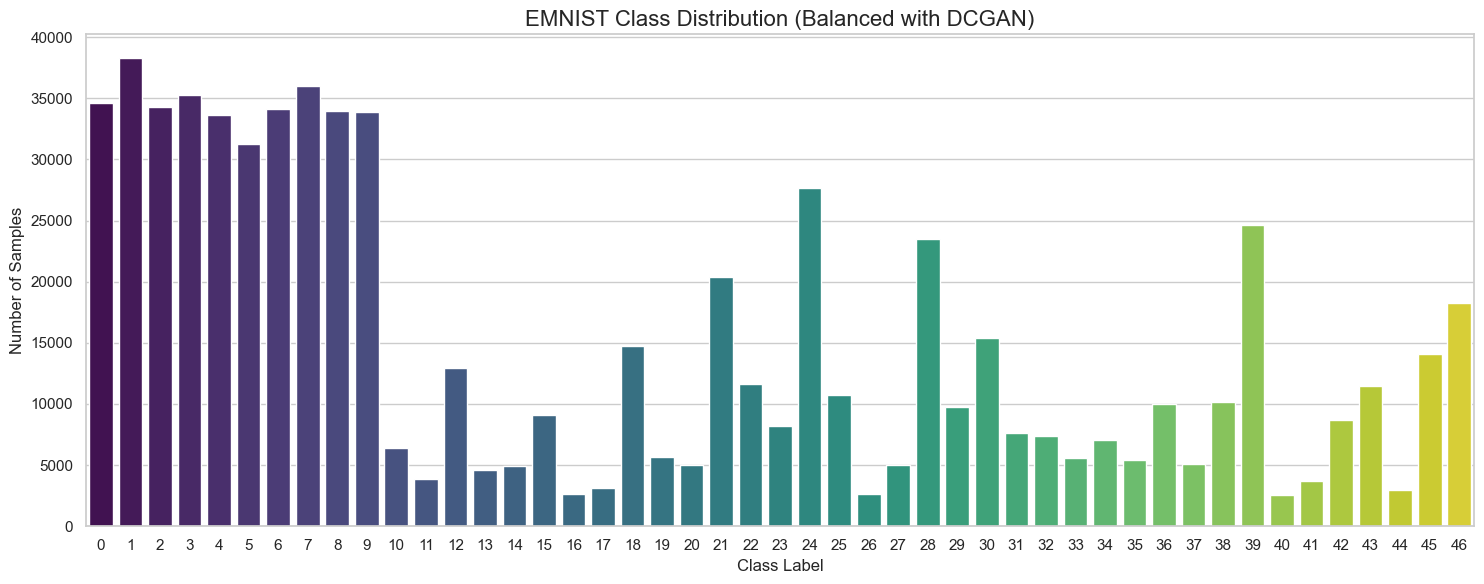

In [47]:
# Convert the balanced labels tensor back to a pandas Series for easy value_counts
y_train_dcgan_balanced_series = pd.Series(y_train_dcgan_balanced.numpy())
balanced_class_counts = y_train_dcgan_balanced_series.value_counts().sort_index()

print("\nClass counts in DCGAN-balanced dataset (first 10 classes):")
print(balanced_class_counts.head(47))

# Check the count for the minority class specifically
print(f"\nCount for minority class ({label_map.get(minority_class_label, minority_class_label)}) in DCGAN-balanced set: {balanced_class_counts.get(minority_class_label, 0)}")
print(f"(Target average was: {average_class_size})")

# Visualize the new distribution (optional)
plt.figure(figsize=(15, 6))
sns.barplot(x=balanced_class_counts.index, y=balanced_class_counts.values, palette="viridis")
plt.title("EMNIST Class Distribution (Balanced with DCGAN)", fontsize=16)
plt.ylabel("Number of Samples", fontsize=12)
plt.xlabel("Class Label", fontsize=12)
plt.tight_layout()
plt.show()


In [54]:
# Ensure you have the minority class images and labels as tensors
# minority_images_tensor (shape: [N, 1, 28, 28], normalized to [-1, 1])
# minority_labels (shape: [N], containing the numeric label for the minority class)

# Convert minority_labels pandas Series to tensor if not already done
# Assuming 'minority_labels' is the pandas Series filtered earlier
minority_labels_tensor = torch.from_numpy(minority_labels.values).long()

# Create a new TensorDataset including labels
minority_dataset_with_labels = TensorDataset(minority_images_tensor, minority_labels_tensor)

# Create the new DataLoader
# Use the same batch_size as before
minority_dataloader_cgan = DataLoader(
    dataset=minority_dataset_with_labels,
    batch_size=batch_size, # Reusing batch_size from Vanilla/DCGAN setup
    shuffle=True,
    num_workers=2
)

print(f"Recreated DataLoader for CGAN with {len(minority_dataloader_cgan)} batches.")
# Now each batch will yield (images, labels)


Recreated DataLoader for CGAN with 40 batches.


In [55]:
class CGAN_Generator(nn.Module):
    def __init__(self, latent_dim, num_classes, img_shape, embedding_dim=50):
        super(CGAN_Generator, self).__init__()
        self.img_shape = img_shape
        self.label_embedding = nn.Embedding(num_classes, embedding_dim)
        
        # Input size = latent_dim + embedding_dim
        input_dim = latent_dim + embedding_dim

        # Using a simple MLP structure similar to Vanilla GAN for comparison
        # Can be adapted to use convolutions like DCGAN if preferred
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, int(np.prod(img_shape))),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        # Get label embeddings
        label_emb = self.label_embedding(labels)
        # Concatenate noise and label embedding
        gen_input = torch.cat((noise, label_emb), -1)
        # Generate image
        img_flat = self.model(gen_input)
        img = img_flat.view(img_flat.size(0), *self.img_shape)
        return img


In [56]:
class CGAN_Discriminator(nn.Module):
    def __init__(self, num_classes, img_shape, embedding_dim=50):
        super(CGAN_Discriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, embedding_dim)
        
        # Input size = flattened image size + embedding_dim
        input_dim = int(np.prod(img_shape)) + embedding_dim

        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, img, labels):
        # Flatten image
        img_flat = img.view(img.size(0), -1)
        # Get label embeddings
        label_emb = self.label_embedding(labels)
        # Concatenate image and label embedding
        d_in = torch.cat((img_flat, label_emb), -1)
        # Get validity score
        validity = self.model(d_in)
        return validity


In [57]:
# Hyperparameters
latent_dim = 100
img_shape = (1, 28, 28)
num_classes = len(label_map) # Should be 47
embedding_dim = 50 # Dimension for label embeddings
lr_cgan = 0.0002
b1_cgan = 0.5
b2_cgan = 0.999
n_epochs_cgan = 50 # Adjust as needed

# Initialize Generator and Discriminator
cgan_generator = CGAN_Generator(latent_dim, num_classes, img_shape, embedding_dim).to(device)
cgan_discriminator = CGAN_Discriminator(num_classes, img_shape, embedding_dim).to(device)

# Loss function
adversarial_loss = nn.BCELoss().to(device)

# Optimizers
optimizer_G_cgan = optim.Adam(cgan_generator.parameters(), lr=lr_cgan, betas=(b1_cgan, b2_cgan))
optimizer_D_cgan = optim.Adam(cgan_discriminator.parameters(), lr=lr_cgan, betas=(b1_cgan, b2_cgan))

print("CGAN Initialization complete.")


CGAN Initialization complete.


Starting CGAN Training...

CGAN Training finished in 134.40s


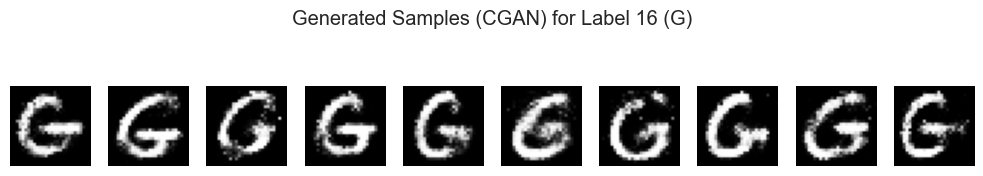

In [58]:
import time

# Training loop for CGAN
start_time_cgan = time.time()

print("Starting CGAN Training...")
for epoch in range(n_epochs_cgan):
    # Use the dataloader that yields images AND labels
    for i, (imgs, labels) in enumerate(minority_dataloader_cgan): 
        
        # Ground truths
        real_labels_gt = torch.ones(imgs.size(0), 1, device=device, dtype=torch.float32)
        fake_labels_gt = torch.zeros(imgs.size(0), 1, device=device, dtype=torch.float32)
        
        # Move real images and their labels to device
        real_imgs = imgs.to(device)
        real_img_labels = labels.to(device) # These are the actual class labels (e.g., 16 for 'G')
        
        # --------------------- #
        #  Train Discriminator #
        # --------------------- #
        optimizer_D_cgan.zero_grad()
        
        # Sample noise and generate fake images for the *same* labels as the real batch
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        fake_imgs = cgan_generator(z, real_img_labels) # Pass noise and labels
        
        # Discriminator loss on real images + real labels
        real_loss = adversarial_loss(cgan_discriminator(real_imgs, real_img_labels), real_labels_gt)
        
        # Discriminator loss on fake images + real labels
        fake_loss = adversarial_loss(cgan_discriminator(fake_imgs.detach(), real_img_labels), fake_labels_gt)
        
        # Total discriminator loss
        d_loss_cgan = (real_loss + fake_loss) / 2
        
        # Backpropagate and update
        d_loss_cgan.backward()
        optimizer_D_cgan.step()
        
        # ----------------- #
        #  Train Generator #
        # ----------------- #
        optimizer_G_cgan.zero_grad()
        
        # Generate new fake images for the same labels
        gen_imgs = cgan_generator(z, real_img_labels)
        
        # Generator loss (tries to fool discriminator)
        g_loss_cgan = adversarial_loss(cgan_discriminator(gen_imgs, real_img_labels), real_labels_gt)
        
        # Backpropagate and update
        g_loss_cgan.backward()
        optimizer_G_cgan.step()
        
        # --- Print Progress --- #
        if (i + 1) % 100 == 0:
            batches_done = epoch * len(minority_dataloader_cgan) + i + 1
            print(
                f"[CGAN Epoch {epoch+1}/{n_epochs_cgan}] [Batch {i+1}/{len(minority_dataloader_cgan)}] "
                f"[D loss: {d_loss_cgan.item():.4f}] [G loss: {g_loss_cgan.item():.4f}] "
                f"Time: {time.time() - start_time_cgan:.2f}s"
            )

print(f"\nCGAN Training finished in {time.time() - start_time_cgan:.2f}s")

cgan_generator.eval()
with torch.no_grad():
    # Generate images for the specific minority class label
    num_samples_show = 10
    z_sample = torch.randn(num_samples_show, latent_dim, device=device)
    # Create labels tensor for the minority class
    label_sample = torch.full((num_samples_show,), minority_class_label, dtype=torch.long, device=device)
    generated_samples_cgan = cgan_generator(z_sample, label_sample).cpu()

plt.figure(figsize=(10, 2))
plt.suptitle(f"Generated Samples (CGAN) for Label {minority_class_label} ({label_map.get(minority_class_label, '?')})")
for i in range(num_samples_show):
    plt.subplot(1, 10, i + 1)
    img_display = (generated_samples_cgan[i] * 0.5 + 0.5).squeeze()
    plt.imshow(img_display, cmap="gray")
    plt.axis("off")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



Generating 12315 samples using CGAN in 97 batches...
Successfully generated 12416 synthetic images using CGAN.
Shape of CGAN generated images tensor: torch.Size([12416, 1, 28, 28])


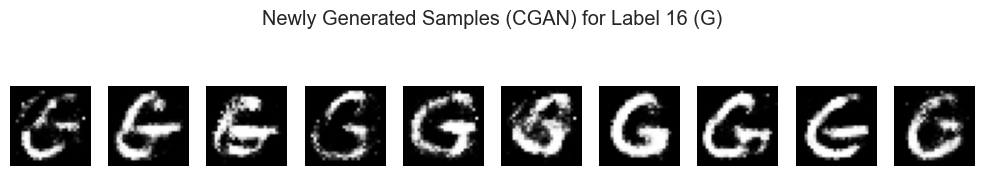

In [59]:
# Ensure CGAN generator is in evaluation mode
cgan_generator.eval()

# List to store generated images
cgan_generated_images_list = []

# Use the same number of samples to generate as calculated before
# Assuming 'num_samples_to_generate' variable still holds the correct value
# Assuming 'num_batches' and 'gen_batch_size' are also available from previous steps
print(f"Generating {num_samples_to_generate} samples using CGAN in {num_batches} batches...")

with torch.no_grad(): # No need to track gradients
    for _ in range(num_batches):
        # Determine current batch size
        current_batch_size = min(gen_batch_size, num_samples_to_generate - len(cgan_generated_images_list))
        if current_batch_size <= 0:
            break
            
        # Sample noise
        z = torch.randn(current_batch_size, latent_dim, device=device)
        
        # Create labels tensor for the minority class for this batch
        gen_labels = torch.full((current_batch_size,), minority_class_label, dtype=torch.long, device=device)
        
        # Generate fake images using noise and the specific class label
        batch_generated_images_cgan = cgan_generator(z, gen_labels)
        
        # Add generated images (on CPU) to the list
        cgan_generated_images_list.append(batch_generated_images_cgan.cpu())

# Concatenate all generated image batches
if cgan_generated_images_list:
    cgan_generated_images = torch.cat(cgan_generated_images_list, dim=0)
    print(f"Successfully generated {cgan_generated_images.shape[0]} synthetic images using CGAN.")
    print(f"Shape of CGAN generated images tensor: {cgan_generated_images.shape}")
else:
    cgan_generated_images = torch.empty((0, *img_shape))
    print("No synthetic samples needed or generated for CGAN.")


if cgan_generated_images.shape[0] > 0:
    plt.figure(figsize=(10, 2))
    plt.suptitle(f"Newly Generated Samples (CGAN) for Label {minority_class_label} ({label_map.get(minority_class_label, "?")})")
    num_to_show = min(10, cgan_generated_images.shape[0])
    for i in range(num_to_show):
        plt.subplot(1, 10, i + 1)
        img_display = (cgan_generated_images[i] * 0.5 + 0.5).squeeze()
        plt.imshow(img_display, cmap='gray')
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



In [60]:
# Create labels for the CGAN generated images
# Ensure minority_class_label holds the correct numeric label
cgan_generated_labels = torch.full((cgan_generated_images.shape[0],), minority_class_label, dtype=torch.long)

print(f"Shape of CGAN generated labels tensor: {cgan_generated_labels.shape}")


Shape of CGAN generated labels tensor: torch.Size([12416])


In [61]:
# Concatenate original images with CGAN generated images
X_train_cgan_balanced = torch.cat((X_train_tensor, cgan_generated_images), dim=0)

# Concatenate original labels with CGAN generated labels
y_train_cgan_balanced = torch.cat((y_train_tensor, cgan_generated_labels), dim=0)

print(f"Shape of X_train balanced with CGAN: {X_train_cgan_balanced.shape}")
print(f"Shape of y_train balanced with CGAN: {y_train_cgan_balanced.shape}")


Shape of X_train balanced with CGAN: torch.Size([710348, 1, 28, 28])
Shape of y_train balanced with CGAN: torch.Size([710348])


In [62]:
# Create TensorDataset for CGAN balanced data
cgan_balanced_train_dataset = TensorDataset(X_train_cgan_balanced, y_train_cgan_balanced)

# Create DataLoader (using clf_batch_size defined earlier)
cgan_balanced_train_loader = DataLoader(cgan_balanced_train_dataset, batch_size=clf_batch_size, shuffle=True, num_workers=2)

print(f"DataLoader created for CGAN Balanced Train: {len(cgan_balanced_train_loader)} batches")


DataLoader created for CGAN Balanced Train: 5550 batches


We are gonna do a classifier now to check the results

In [48]:
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        # Input shape: (N, 1, 28, 28)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2)
        # Shape after conv1: (N, 32, 28, 28)
        # Shape after pool1: (N, 32, 14, 14)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2)
        # Shape after conv2: (N, 64, 14, 14)
        # Shape after pool2: (N, 64, 7, 7)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Flatten the output for the fully connected layers
        # Size = 64 channels * 7 height * 7 width
        self.fc1 = nn.Linear(64 * 7 * 7, 1024) 
        self.fc2 = nn.Linear(1024, num_classes) # Output layer

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        # Flatten the tensor
        x = x.view(x.size(0), -1) 
        x = F.relu(self.fc1(x))
        # No activation on final layer, as CrossEntropyLoss expects raw scores (logits)
        x = self.fc2(x)
        return x

# Determine the number of classes from our data (should be 47 for ByMerge)
num_classes = len(label_map) # Use the label map loaded earlier
print(f"Number of classes for classifier: {num_classes}")


Number of classes for classifier: 47


In [49]:
# Define the path to your test data file
test_file_path = 'emnist-bymerge-test.csv'

# Load the test data
try:
    emnist_test_df = pd.read_csv(test_file_path, header=None)
    print(f"Successfully loaded {test_file_path}")
    print(f"Test dataset shape: {emnist_test_df.shape}")
    
    # Separate labels and images
    y_test = emnist_test_df.iloc[:, 0]
    X_test = emnist_test_df.iloc[:, 1:]
    
    # Preprocess X_test (convert, reshape, normalize)
    X_test_np = X_test.values.astype(np.float32)
    X_test_reshaped = X_test_np.reshape(-1, 28, 28).transpose(0, 2, 1)
    X_test_reshaped = np.expand_dims(X_test_reshaped, axis=1)
    X_test_tensor = torch.from_numpy(X_test_reshaped)
    X_test_tensor = X_test_tensor / 255.0
    X_test_tensor = (X_test_tensor - 0.5) / 0.5
    
    # Preprocess y_test (convert to tensor)
    y_test_tensor = torch.from_numpy(y_test.values).long()
    
    print(f"Processed X_test tensor shape: {X_test_tensor.shape}")
    print(f"Processed y_test tensor shape: {y_test_tensor.shape}")

except FileNotFoundError:
    print(f"Error: Could not find the test file at {test_file_path}")
except Exception as e:
    print(f"An error occurred loading/processing test data: {e}")


Successfully loaded emnist-bymerge-test.csv
Test dataset shape: (116323, 785)
Processed X_test tensor shape: torch.Size([116323, 1, 28, 28])
Processed y_test tensor shape: torch.Size([116323])


In [50]:
# Classifier training batch size
clf_batch_size = 128

# Create TensorDatasets
original_train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
vanilla_balanced_train_dataset = TensorDataset(X_train_vanilla_balanced, y_train_vanilla_balanced)
dcgan_balanced_train_dataset = TensorDataset(X_train_dcgan_balanced, y_train_dcgan_balanced)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
original_train_loader = DataLoader(original_train_dataset, batch_size=clf_batch_size, shuffle=True, num_workers=2)
vanilla_balanced_train_loader = DataLoader(vanilla_balanced_train_dataset, batch_size=clf_batch_size, shuffle=True, num_workers=2)
dcgan_balanced_train_loader = DataLoader(dcgan_balanced_train_dataset, batch_size=clf_batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=clf_batch_size, shuffle=False, num_workers=2) # No shuffle for test set

print("DataLoaders created:")
print(f"  Original Train: {len(original_train_loader)} batches")
print(f"  Vanilla Balanced Train: {len(vanilla_balanced_train_loader)} batches")
print(f"  DCGAN Balanced Train: {len(dcgan_balanced_train_loader)} batches")
print(f"  Test: {len(test_loader)} batches")


DataLoaders created:
  Original Train: 5453 batches
  Vanilla Balanced Train: 5550 batches
  DCGAN Balanced Train: 5454 batches
  Test: 909 batches


In [51]:
# Function to train the classifier
def train_classifier(model, train_loader, optimizer, criterion, device, num_epochs=5):
    print(f"Starting training for {num_epochs} epochs...")
    model.train() # Set the model to training mode
    start_time = time.time()
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0
        
        for i, (images, labels) in enumerate(train_loader):
            # Move data to the specified device (CPU or GPU)
            images = images.to(device)
            labels = labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Track statistics
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()
            
            # Print progress occasionally
            if (i + 1) % 200 == 0: # Print every 200 batches
                print(f"  Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
                
        epoch_loss = running_loss / total_samples
        epoch_acc = correct_predictions / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}] completed. Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")
        
    end_time = time.time()
    print(f"Training finished in {end_time - start_time:.2f}s")
    return model # Return the trained model


In [52]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Function to evaluate the classifier
def evaluate_classifier(model, test_loader, device, dataset_name):
    print(f"\nEvaluating model trained on 	{dataset_name}...")
    model.eval() # Set the model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad(): # No need to track gradients during evaluation
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    # Use macro average for precision, recall, f1 to treat all classes equally
    # Use zero_division=0 to handle cases where a class might not be predicted
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="macro", zero_division=0)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    print(f"Results for {dataset_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision (Macro): {precision:.4f}")
    print(f"  Recall (Macro): {recall:.4f}")
    print(f"  F1-Score (Macro): {f1:.4f}")
    
    # Print classification report for more details (per-class metrics)
    # Get class names from label_map, ensure correct order
    class_names = [label_map.get(i, str(i)) for i in range(num_classes)]
    print("\nClassification Report:")
    # Use target_names if available and correctly ordered
    try:
        report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
        print(report)
    except Exception as e:
        print(f"Could not generate report with class names: {e}")
        report = classification_report(all_labels, all_preds, zero_division=0)
        print(report)
        
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="Blues", 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.show()
    
    # Store results for later comparison
    results = {
        "Dataset": dataset_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }
    return results



--- Training Classifier on Original Imbalanced Data ---
Starting training for 5 epochs...
  Epoch [1/5], Batch [200/5453], Loss: 0.5738
  Epoch [1/5], Batch [400/5453], Loss: 0.4515
  Epoch [1/5], Batch [600/5453], Loss: 0.4421
  Epoch [1/5], Batch [800/5453], Loss: 0.2085
  Epoch [1/5], Batch [1000/5453], Loss: 0.2549
  Epoch [1/5], Batch [1200/5453], Loss: 0.3217
  Epoch [1/5], Batch [1400/5453], Loss: 0.2759
  Epoch [1/5], Batch [1600/5453], Loss: 0.3144
  Epoch [1/5], Batch [1800/5453], Loss: 0.4608
  Epoch [1/5], Batch [2000/5453], Loss: 0.2648
  Epoch [1/5], Batch [2200/5453], Loss: 0.3034
  Epoch [1/5], Batch [2400/5453], Loss: 0.2625
  Epoch [1/5], Batch [2600/5453], Loss: 0.3154
  Epoch [1/5], Batch [2800/5453], Loss: 0.1733
  Epoch [1/5], Batch [3000/5453], Loss: 0.2539
  Epoch [1/5], Batch [3200/5453], Loss: 0.1972
  Epoch [1/5], Batch [3400/5453], Loss: 0.2585
  Epoch [1/5], Batch [3600/5453], Loss: 0.3384
  Epoch [1/5], Batch [3800/5453], Loss: 0.3654
  Epoch [1/5], Batch

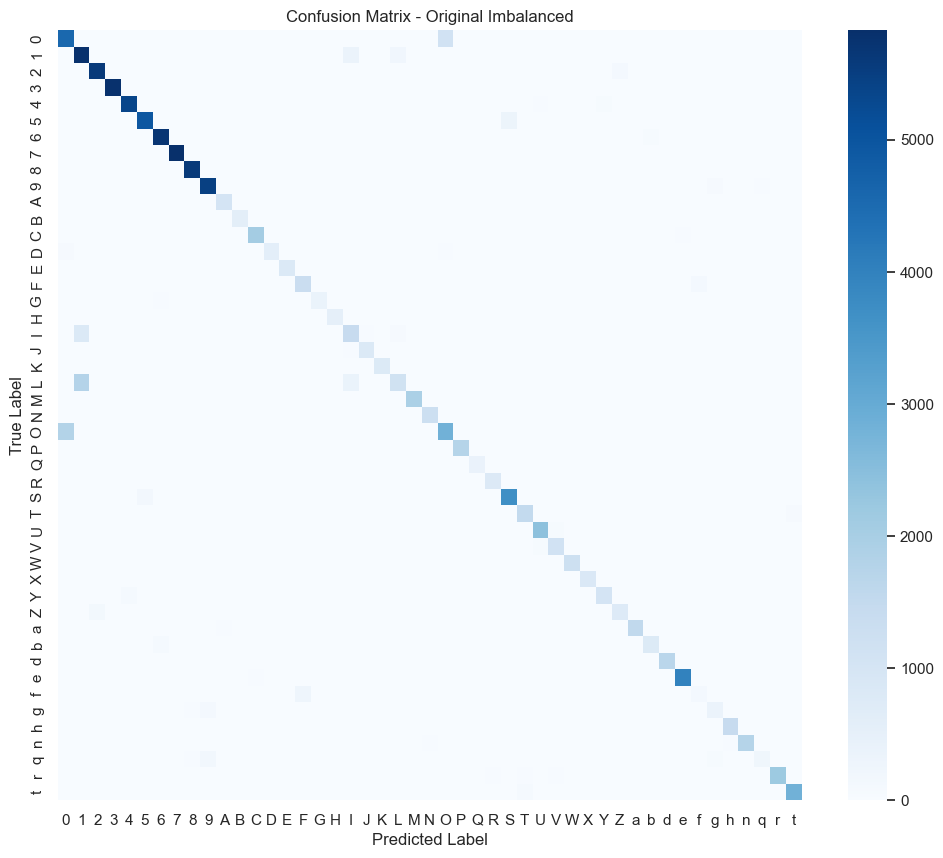


--- Finished Scenario 1: Original Imbalanced Data ---


In [53]:
#Scenario 1: Train on Original Imbalanced Data

print("\n--- Training Classifier on Original Imbalanced Data ---")

# Initialize a new instance of the classifier
cnn_original = SimpleCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
clf_criterion = nn.CrossEntropyLoss().to(device)
clf_optimizer_original = optim.Adam(cnn_original.parameters(), lr=0.001) # Using a standard learning rate for classifier

# Train the classifier
# Using 5 epochs for demonstration, you might need more for better convergence
cnn_original_trained = train_classifier(cnn_original, original_train_loader, clf_optimizer_original, clf_criterion, device, num_epochs=5)

# Evaluate the trained classifier
results_original = evaluate_classifier(cnn_original_trained, test_loader, device, "Original Imbalanced")

# Store results in a list for later comparison
all_results = [results_original]

print("\n--- Finished Scenario 1: Original Imbalanced Data ---")



--- Training Classifier on Vanilla GAN Balanced Data ---
Starting training for 5 epochs...
  Epoch [1/5], Batch [200/5550], Loss: 0.4967
  Epoch [1/5], Batch [400/5550], Loss: 0.5952
  Epoch [1/5], Batch [600/5550], Loss: 0.3249
  Epoch [1/5], Batch [800/5550], Loss: 0.3587
  Epoch [1/5], Batch [1000/5550], Loss: 0.3419
  Epoch [1/5], Batch [1200/5550], Loss: 0.4059
  Epoch [1/5], Batch [1400/5550], Loss: 0.5252
  Epoch [1/5], Batch [1600/5550], Loss: 0.3552
  Epoch [1/5], Batch [1800/5550], Loss: 0.2621
  Epoch [1/5], Batch [2000/5550], Loss: 0.4156
  Epoch [1/5], Batch [2200/5550], Loss: 0.3083
  Epoch [1/5], Batch [2400/5550], Loss: 0.2532
  Epoch [1/5], Batch [2600/5550], Loss: 0.3387
  Epoch [1/5], Batch [2800/5550], Loss: 0.2498
  Epoch [1/5], Batch [3000/5550], Loss: 0.2782
  Epoch [1/5], Batch [3200/5550], Loss: 0.2853
  Epoch [1/5], Batch [3400/5550], Loss: 0.2464
  Epoch [1/5], Batch [3600/5550], Loss: 0.2366
  Epoch [1/5], Batch [3800/5550], Loss: 0.2924
  Epoch [1/5], Batc

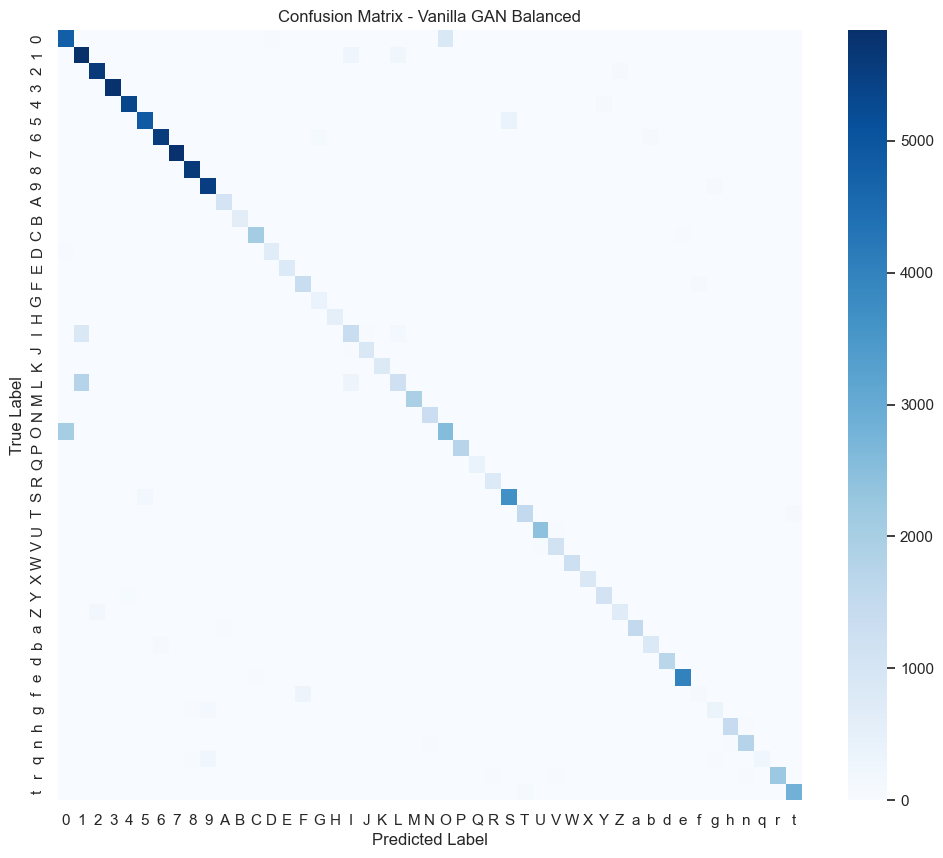


--- Finished Scenario 2: Vanilla GAN Balanced Data ---


In [68]:
#Scenario 2: Train on Vanilla GAN Balanced Data

print("\n--- Training Classifier on Vanilla GAN Balanced Data ---")

# Initialize a new instance of the classifier
cnn_vanilla = SimpleCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
clf_criterion = nn.CrossEntropyLoss().to(device) # Can reuse the criterion definition
clf_optimizer_vanilla = optim.Adam(cnn_vanilla.parameters(), lr=0.001)

# Train the classifier using the Vanilla GAN balanced loader
cnn_vanilla_trained = train_classifier(cnn_vanilla, vanilla_balanced_train_loader, clf_optimizer_vanilla, clf_criterion, device, num_epochs=5)

# Evaluate the trained classifier
results_vanilla = evaluate_classifier(cnn_vanilla_trained, test_loader, device, "Vanilla GAN Balanced")

# Append results to our list
all_results.append(results_vanilla)

print("\n--- Finished Scenario 2: Vanilla GAN Balanced Data ---")



--- Training Classifier on DCGAN Balanced Data ---
Starting training for 5 epochs...
  Epoch [1/5], Batch [200/5454], Loss: 0.4625
  Epoch [1/5], Batch [400/5454], Loss: 0.3663
  Epoch [1/5], Batch [600/5454], Loss: 0.4747
  Epoch [1/5], Batch [800/5454], Loss: 0.3947
  Epoch [1/5], Batch [1000/5454], Loss: 0.5370
  Epoch [1/5], Batch [1200/5454], Loss: 0.4341
  Epoch [1/5], Batch [1400/5454], Loss: 0.2330
  Epoch [1/5], Batch [1600/5454], Loss: 0.2905
  Epoch [1/5], Batch [1800/5454], Loss: 0.2130
  Epoch [1/5], Batch [2000/5454], Loss: 0.4597
  Epoch [1/5], Batch [2200/5454], Loss: 0.3263
  Epoch [1/5], Batch [2400/5454], Loss: 0.2872
  Epoch [1/5], Batch [2600/5454], Loss: 0.2656
  Epoch [1/5], Batch [2800/5454], Loss: 0.3951
  Epoch [1/5], Batch [3000/5454], Loss: 0.4049
  Epoch [1/5], Batch [3200/5454], Loss: 0.2779
  Epoch [1/5], Batch [3400/5454], Loss: 0.4559
  Epoch [1/5], Batch [3600/5454], Loss: 0.4337
  Epoch [1/5], Batch [3800/5454], Loss: 0.4040
  Epoch [1/5], Batch [400

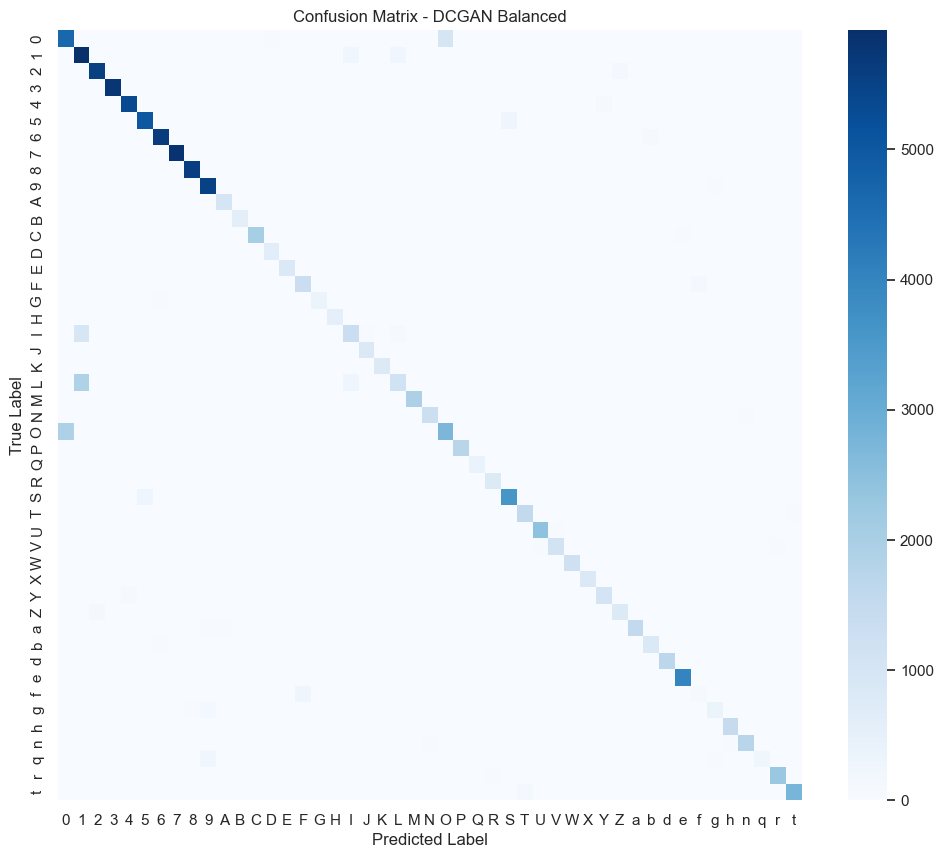


--- Finished Scenario 3: DCGAN Balanced Data ---


In [71]:
#Scenario 3: Train on DCGAN Balanced Data

print("\n--- Training Classifier on DCGAN Balanced Data ---")

# Initialize a new instance of the classifier
cnn_dcgan = SimpleCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
clf_criterion = nn.CrossEntropyLoss().to(device)  # Can reuse the criterion definition
clf_optimizer_dcgan = optim.Adam(cnn_dcgan.parameters(), lr=0.001)

# Train the classifier using the DCGAN balanced loader
cnn_dcgan_trained = train_classifier(cnn_dcgan, dcgan_balanced_train_loader, clf_optimizer_dcgan, clf_criterion,
                                       device, num_epochs=5)

# Evaluate the trained classifier
results_dcgan = evaluate_classifier(cnn_dcgan_trained, test_loader, device, "DCGAN Balanced")

# Append results to our list
all_results.append(results_dcgan)

print("\n--- Finished Scenario 3: DCGAN Balanced Data ---")


--- Training Classifier on CGAN Balanced Data ---
Starting training for 5 epochs...
  Epoch [1/5], Batch [200/5550], Loss: 0.1526
  Epoch [1/5], Batch [400/5550], Loss: 0.2047
  Epoch [1/5], Batch [600/5550], Loss: 0.1614
  Epoch [1/5], Batch [800/5550], Loss: 0.1698
  Epoch [1/5], Batch [1000/5550], Loss: 0.1737
  Epoch [1/5], Batch [1200/5550], Loss: 0.1560
  Epoch [1/5], Batch [1400/5550], Loss: 0.1288
  Epoch [1/5], Batch [1600/5550], Loss: 0.2417
  Epoch [1/5], Batch [1800/5550], Loss: 0.1863
  Epoch [1/5], Batch [2000/5550], Loss: 0.2489
  Epoch [1/5], Batch [2200/5550], Loss: 0.1402
  Epoch [1/5], Batch [2400/5550], Loss: 0.1345
  Epoch [1/5], Batch [2600/5550], Loss: 0.1464
  Epoch [1/5], Batch [2800/5550], Loss: 0.1323
  Epoch [1/5], Batch [3000/5550], Loss: 0.1351
  Epoch [1/5], Batch [3200/5550], Loss: 0.2229
  Epoch [1/5], Batch [3400/5550], Loss: 0.1784
  Epoch [1/5], Batch [3600/5550], Loss: 0.1773
  Epoch [1/5], Batch [3800/5550], Loss: 0.2029
  Epoch [1/5], Batch [4000

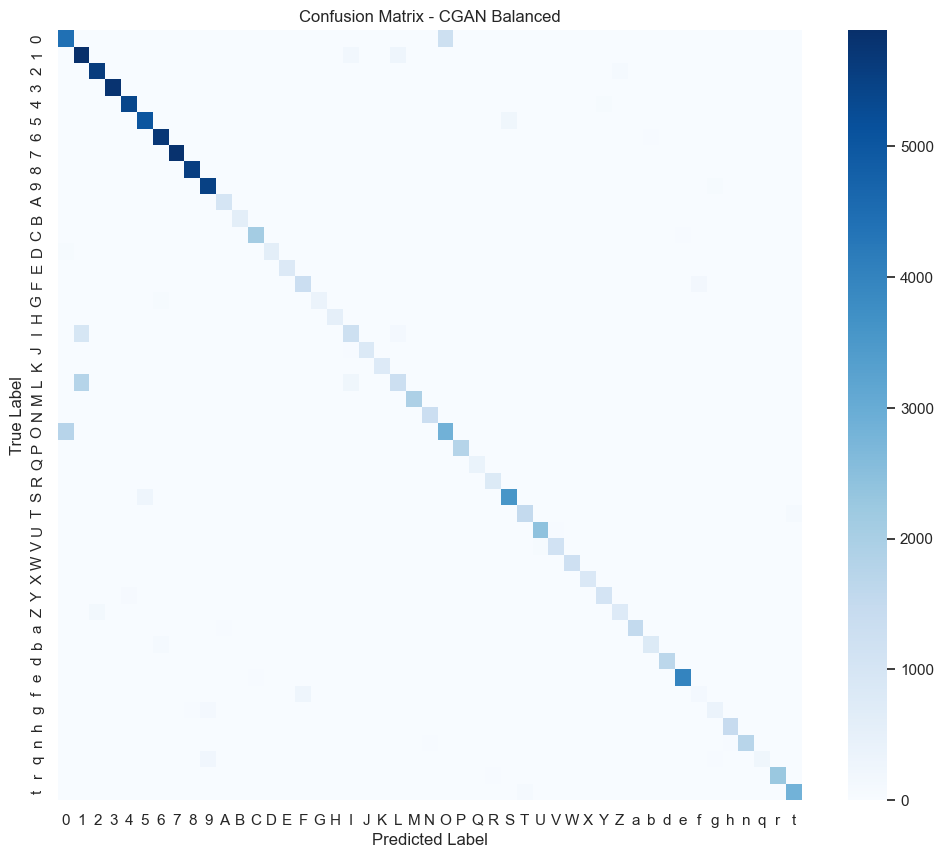


--- Finished Scenario 4: CGAN Balanced Data ---


In [70]:
#Scenario 4: Train on CGAN Balanced Data

print("\n--- Training Classifier on CGAN Balanced Data ---")

# Initialize a new instance of the classifier
cnn_cgan = SimpleCNN(num_classes=num_classes).to(device)

# Define loss function and optimizer
clf_criterion = nn.CrossEntropyLoss().to(device)  # Can reuse the criterion definition
clf_optimizer_cgan = optim.Adam(cnn_cgan.parameters(), lr=0.001)

# Train the classifier using the CGAN balanced loader
cnn_cgan_trained = train_classifier(cnn_dcgan, cgan_balanced_train_loader, clf_optimizer_cgan, clf_criterion,
                                       device, num_epochs=5)

# Evaluate the trained classifier
results_cgan = evaluate_classifier(cnn_cgan_trained, test_loader, device, "CGAN Balanced")

# Append results to our list
all_results.append(results_cgan)

print("\n--- Finished Scenario 4: CGAN Balanced Data ---")